# 3. Statevector

Hier geht es um die Darstellung der **Zustandsvektoren** entweder eines Qubits oder eines Registers (bestehend aus $n$ Qubits). Dabei ist der Zustandsvektor ein $2^n$-komponentiger Vektor mit (im Allg.) komplexen Komponenten (Amplituden). Zu beachten ist, dass die üblicherweise mit $i$ geschriebene imaginäre Einheit hier mit $j$ dargestellt wird. 

Zunächst werden die benötigten Komponenten eingebunden und das Backend festgelegt:

In [1]:
from qiskit import QuantumCircuit, BasicAer
backend = BasicAer.get_backend('statevector_simulator')


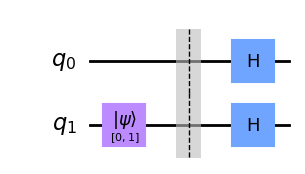

In [2]:
qc = QuantumCircuit(2) # Schaltkreis wird mit zwei Qubits (q_0 und q_1) definiert
qc.initialize([0,1], 1) # Das zweite Qubit (q_1) wird im Zustand 1 initialisiert
qc.barrier() # Barriere einfügen zur optischen Abgrenzung von Präparation und Operation
qc.h(0) # Auf qubit q_0 wird die Hadamard-Transformation angewendet
qc.h(1) # Auf qubit q_1 wird ebenfalls die Hadamard-Transformation angewendet
qc.draw('mpl') # Schaltkreis wird mithilfe der MathPlotLib schön gezeichnet.

Probieren Sie die Funktion `.draw()` auch mit dem Argument `'latex'` und auch ohne Argument aus!

Nun müssen die beiden Hadamard-Transformationen auch ausgeführt werden. Dazu muss die Funktion *execute* importiert werden:

In [3]:
from qiskit.execute_function import execute
job = execute(qc, backend)

Die Funktion *execute* wird auf den Quantenschaltkreis *qc* mit dem oben gewählten Backend *statevector_simulator* ausgeübt.

In [4]:
result = job.result() # Ergebnisausgabe

Wenn es Sie interessiert, welche Informationen in der Variablen `result` gespeichert sind, drucken Sie sie mit `print (result)` aus. Aus dieser Variablen `result` muss nun der `statevector` (als Vektor-Variable) extrahiert werden:

In [5]:
state_vector = result.get_statevector() #Extraktion des Zustandsvektors
print(state_vector) # Ausgabe des Zustandsvektors als Zeilenvektor mit vier (komplexen) Komponenten

[ 0.5-6.123234e-17j  0.5-6.123234e-17j -0.5+6.123234e-17j
 -0.5+6.123234e-17j]


Das Resultat ist ein vierkomponentiger Vektor mit nur reellen komponenten. Die imaginären Anteile werden trotzdem mit `0.0000j` angegeben. Vereinfacht dargestellt:  [0.5&nbsp;0.5&nbsp;-0.5&nbsp;-0.5].

**Kleine Übung:** Rechnen Sie den Schaltkreis von Hand durch und vergleichen Sie mit dem obigen Resultat.

**Lösung:**


 
 $H_{01}|01\rangle = H|0\rangle H|1\rangle=\frac{1}{\sqrt{2}}\left[|0\rangle+|1\rangle\right]\cdot\frac{1}{\sqrt{2}}\left[|0\rangle-|1\rangle\right]$:
  <p>
    $$\langle 1|0\rangle = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix} = 0$$
  </p>  
  Bei  normierten Vektoren liefert das innere Produkt den Wert $1$, wie man an den beiden Basisvektoren  $|0\rangle$ and $|1\rangle$ sehen kann:
    
$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 , & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   